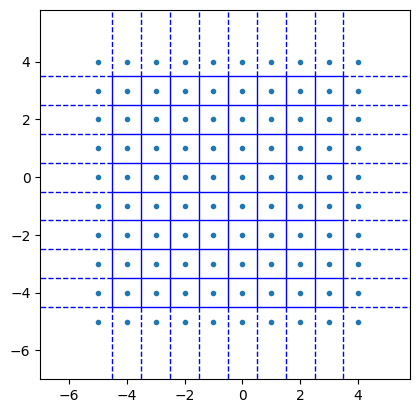

In [312]:
import ForwardPassUtils as fpu
import torch
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d, Delaunay, cKDTree
mini = -5
maxi = 5
points = [(x, y) for x in range(mini, maxi) for y in range(mini,maxi)]
voronoi_initial = Voronoi(points)
minX, maxX, minY, maxY = fpu.computeMinMax(voronoi_initial)
fig, ax = plt.subplots()
voronoi_plot_2d(voronoi_initial, ax=ax, show_vertices=False, line_colors='blue')
plt.xlim(minX-1, maxX+1)
plt.ylim(minY-1, maxY+1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [308]:
import numpy as np

def sdf_rec(p, b):
    #b is half side length to facilitate the computation of the distance in all 4 quadrants
    d = np.abs(p) - np.array(b)/2
    return np.linalg.norm(np.maximum(d, 0)) + min(max(d[0], d[1]), 0)
    #return np.linalg.norm(np.maximum(np.abs(p) - b, 0))

def sdf_box(p,b):
    q = np.abs(p) - b
    return np.linalg.norm(np.maximum(q,0)) + min(max(q[0],max(q[1],q[2])),0)

Distance from point to rectangle: -0.50


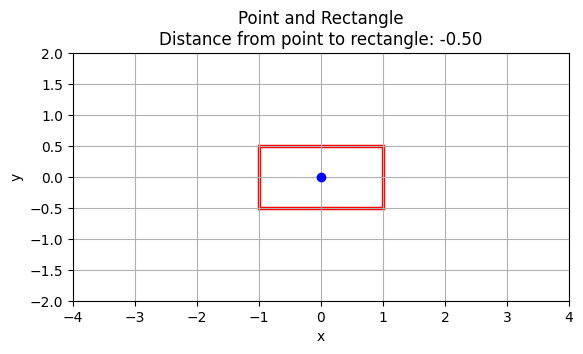

In [309]:
# Example usage
#point position
p = [0.0,0.0]
#rect dimension
b = [2.0, 1.0]
distance = sdf_rec(p, b)
print(f"Distance from point to rectangle: {distance:.2f}")

# Create a rectangle centered at origin with dimensions b
rectangle = plt.Rectangle((-b[0]/2,-b[1]/2), b[0], b[1], edgecolor='r', facecolor='none', linewidth=2.5)

# Plotting
fig, ax = plt.subplots()
ax.add_patch(rectangle)
ax.plot(p[0], p[1], 'bo')  # plot the point
ax.set_xlim(-2*b[0], 2*b[0])
ax.set_ylim(-2*b[1], 2*b[1])
ax.set_aspect('equal', adjustable='box')

plt.xlabel('x')
plt.ylabel('y')
plt.title(f"Point and Rectangle\nDistance from point to rectangle: {distance:.2f}")
plt.grid(True)
plt.show()

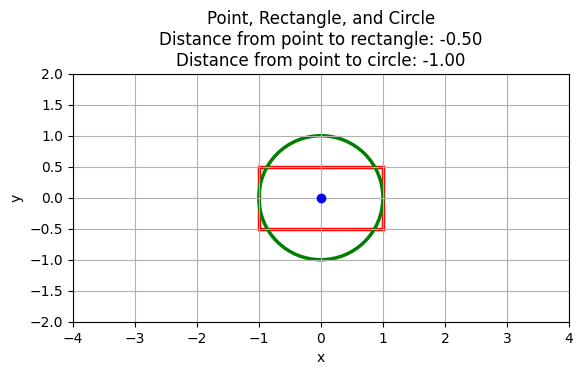

In [310]:
import numpy as np
import matplotlib.pyplot as plt

def sdCircle(p, r):
    return np.linalg.norm(p) - r

r = 1

distance_circle = sdCircle(p, r)

# Create a rectangle centered at origin with dimensions 2*b
rectangle = plt.Rectangle((-b[0]/2,-b[1]/2), b[0], b[1], edgecolor='r', facecolor='none', linewidth=2.5)

# Create a circle centered at the origin with radius r
circle = plt.Circle((0, 0), r, edgecolor='g', facecolor='none', linewidth=2.5)

# Plotting
fig, ax = plt.subplots()
ax.add_patch(rectangle)
ax.add_patch(circle)
ax.plot(p[0], p[1], 'bo')  # plot the point
ax.set_xlim(-2*b[0], 2*b[0])
ax.set_ylim(-2*b[1], 2*b[1])
ax.set_aspect('equal', adjustable='box')

plt.xlabel('x')
plt.ylabel('y')
plt.title(f"Point, Rectangle, and Circle\n"
          f"Distance from point to rectangle: {distance:.2f}\n"
          f"Distance from point to circle: {distance_circle:.2f}")
plt.grid(True)
plt.show()


In [316]:
# Example points
points = [(x, y) for x in range(-5,5) for y in range(-5,5)]
b = [7, 3]


# Add the third dimension (SDF value)
points_with_sdf = [(x, y, sdf_rec(np.array([x, y]), b)) for x, y in points]

# Print the results
for point in points_with_sdf:
    print(point)


(-5, -5, 3.8078865529319543)
(-5, -4, 2.9154759474226504)
(-5, -3, 2.1213203435596424)
(-5, -2, 1.5811388300841898)
(-5, -1, 1.5)
(-5, 0, 1.5)
(-5, 1, 1.5)
(-5, 2, 1.5811388300841898)
(-5, 3, 2.1213203435596424)
(-5, 4, 2.9154759474226504)
(-4, -5, 3.5355339059327378)
(-4, -4, 2.5495097567963922)
(-4, -3, 1.5811388300841898)
(-4, -2, 0.7071067811865476)
(-4, -1, 0.5)
(-4, 0, 0.5)
(-4, 1, 0.5)
(-4, 2, 0.7071067811865476)
(-4, 3, 1.5811388300841898)
(-4, 4, 2.5495097567963922)
(-3, -5, 3.5)
(-3, -4, 2.5)
(-3, -3, 1.5)
(-3, -2, 0.5)
(-3, -1, -0.5)
(-3, 0, -0.5)
(-3, 1, -0.5)
(-3, 2, 0.5)
(-3, 3, 1.5)
(-3, 4, 2.5)
(-2, -5, 3.5)
(-2, -4, 2.5)
(-2, -3, 1.5)
(-2, -2, 0.5)
(-2, -1, -0.5)
(-2, 0, -1.5)
(-2, 1, -0.5)
(-2, 2, 0.5)
(-2, 3, 1.5)
(-2, 4, 2.5)
(-1, -5, 3.5)
(-1, -4, 2.5)
(-1, -3, 1.5)
(-1, -2, 0.5)
(-1, -1, -0.5)
(-1, 0, -1.5)
(-1, 1, -0.5)
(-1, 2, 0.5)
(-1, 3, 1.5)
(-1, 4, 2.5)
(0, -5, 3.5)
(0, -4, 2.5)
(0, -3, 1.5)
(0, -2, 0.5)
(0, -1, -0.5)
(0, 0, -1.5)
(0, 1, -0.5)
(0, 2, 0.5)
(0

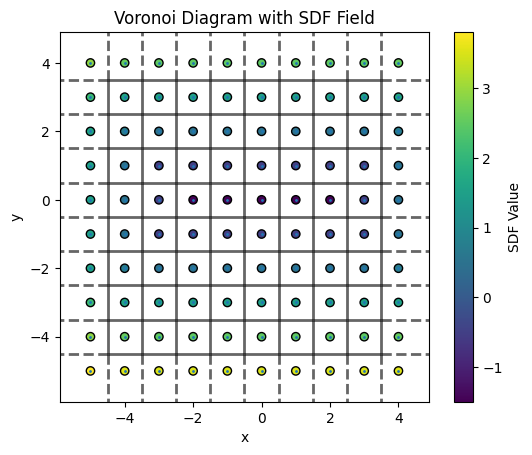

In [317]:
# Separate the points and their SDF values
xy_points = np.array([[x, y] for x, y, sdf in points_with_sdf])
sdf_values = np.array([sdf for x, y, sdf in points_with_sdf])

# Compute Voronoi diagram
vor = Voronoi(xy_points)

# Plot Voronoi diagram
fig, ax = plt.subplots()
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='black', line_width=2, line_alpha=0.6, point_size=2)

# Create scatter plot of points colored by their SDF value
sc = ax.scatter(xy_points[:, 0], xy_points[:, 1], c=sdf_values, cmap='viridis', edgecolor='k')

# Add color bar
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('SDF Value')
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Voronoi Diagram with SDF Field')
plt.show()


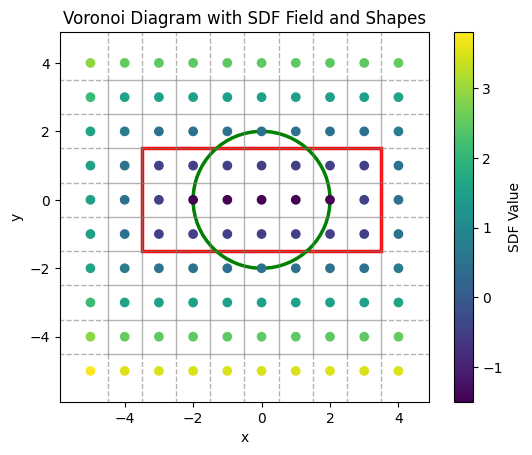

In [332]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

r = 2  # Radius for the circle
# Compute Voronoi diagram
vor = Voronoi(xy_points)

# Plot Voronoi diagram
fig, ax = plt.subplots()
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='grey', line_width=1, line_alpha=0.6, point_size=0)

# Create a rectangle centered at origin with dimensions 2*b
rectangle = plt.Rectangle((-b[0]/2,-b[1]/2), b[0], b[1], edgecolor='r', facecolor='none', linewidth=2.5)
ax.add_patch(rectangle)

# Create a circle centered at the origin with radius r
circle = plt.Circle((0, 0), r, edgecolor='g', facecolor='none', linewidth=2.5)
ax.add_patch(circle)

# Create scatter plot of points colored by their SDF value
sc = ax.scatter(xy_points[:, 0], xy_points[:, 1], c=sdf_values, cmap='viridis')

# Add color bar
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('SDF Value')
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Voronoi Diagram with SDF Field and Shapes')

#plt.grid(True)
plt.show()


#le target est des points sample sur la surface du cercle 
# il faut identifier tous les vertex qui sont sur la surface du rectangle et donc les sites associés "zero-crossing"



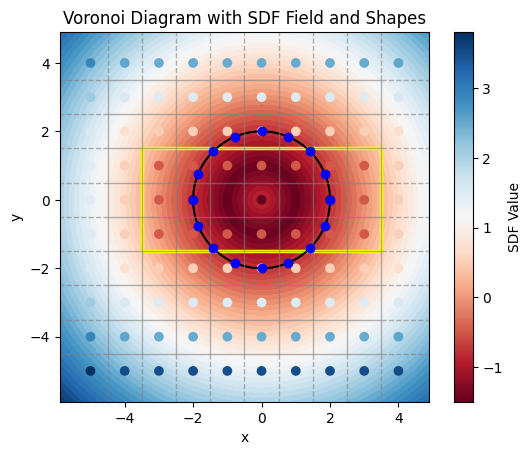

In [354]:
def distance_to_nearest_point(x, y, points):
    distances = np.sqrt((x - points[:, 0, np.newaxis, np.newaxis])**2 + (y - points[:, 1, np.newaxis, np.newaxis])**2)
    return np.min(distances, axis=0)

r = 2  # Radius for the circle
# Compute Voronoi diagram
vor = Voronoi(xy_points)

# Define grid
x = np.linspace(-6, 6, 400)
y = np.linspace(-6, 6, 400)
X, Y = np.meshgrid(x, y)
Z = fpu.sdf_circle(X, Y, radius=r)
# Compute distance field
dist_field = distance_to_nearest_point(X, Y, circle_points)

# Plot Voronoi diagram
fig, ax = plt.subplots()
plt.contourf(X, Y, dist_field, levels=50, cmap='RdBu')
# Plot the zero level set (the circle boundary)
ax.contour(X, Y, Z, levels=[0], colors='black')

voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='grey', line_width=1, line_alpha=0.6, point_size=0)

# Create a rectangle centered at origin with dimensions 2*b
rectangle = plt.Rectangle((-b[0]/2,-b[1]/2), b[0], b[1], edgecolor='yellow', facecolor='none', linewidth=2.5)
ax.add_patch(rectangle)




n_points = 16
theta = np.linspace(0, 2*np.pi, n_points, endpoint=False)
target_points = np.array([r*np.cos(theta), r*np.sin(theta)]).T
ax.plot(target_points[:, 0], target_points[:, 1], 'bo')  # plot the point


# Create a circle centered at the origin with radius r
#circle = plt.Circle((0, 0), r, edgecolor='g', facecolor='none', linewidth=2.5)
#ax.add_patch(circle)

# Create scatter plot of points colored by their SDF value
sc = ax.scatter(xy_points[:, 0], xy_points[:, 1], c=sdf_values, cmap='RdBu')

# Add color bar

cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('SDF Value')
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Voronoi Diagram with SDF Field and Shapes')



#plt.title('Distance Field from Sampled Points on Circle')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

def plot_values(list1, list2, title='Plot of Two Lists', xlabel='X-axis', ylabel='Y-axis', list1_label='List 1', list2_label='List 2'):
    plt.figure()
    
    # Plot the first list
    plt.plot(list1, label=list1_label, marker='o')
    
    # Plot the second list
    plt.plot(list2, label=list2_label, marker='x')
    
    # Add title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Add a legend
    plt.legend()
    #plt.ylim(-2,10)
    # Show the plot
    plt.grid(True)
    plt.show()



In [286]:
#sample target points on the circle surface
n_points = 16
theta = np.linspace(0, 2*np.pi, n_points, endpoint=False)
target_points = np.array([r*np.cos(theta), r*np.sin(theta)]).T
print(target_points)

[[ 2.00000000e+00  0.00000000e+00]
 [ 1.84775907e+00  7.65366865e-01]
 [ 1.41421356e+00  1.41421356e+00]
 [ 7.65366865e-01  1.84775907e+00]
 [ 1.22464680e-16  2.00000000e+00]
 [-7.65366865e-01  1.84775907e+00]
 [-1.41421356e+00  1.41421356e+00]
 [-1.84775907e+00  7.65366865e-01]
 [-2.00000000e+00  2.44929360e-16]
 [-1.84775907e+00 -7.65366865e-01]
 [-1.41421356e+00 -1.41421356e+00]
 [-7.65366865e-01 -1.84775907e+00]
 [-3.67394040e-16 -2.00000000e+00]
 [ 7.65366865e-01 -1.84775907e+00]
 [ 1.41421356e+00 -1.41421356e+00]
 [ 1.84775907e+00 -7.65366865e-01]]


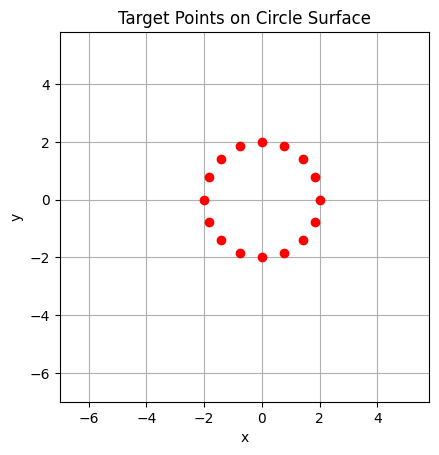

In [291]:
#scatter the target points
fig, ax = plt.subplots()
#ax.add_patch(rectangle)
#ax.add_patch(circle)
ax.plot(target_points[:, 0], target_points[:, 1], 'ro')  # plot the point
plt.xlim(minX-1, maxX+1)
plt.ylim(minY-1, maxY+1)
ax.set_aspect('equal', adjustable='box')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f"Target Points on Circle Surface")
plt.grid(True)
plt.show()


In [288]:
zero_crossing_sites = []

for point_idx, region in enumerate(vor.regions):
    if not -1 in region:
        vertices = np.array([vor.vertices[i] for i in region])
        neighbor_sdf_values = [rectangle_sdf(vertex, rect_min, rect_max) for vertex in vertices]
        
        if any(np.sign(neighbor_sdf_values) != np.sign(sdf_values[point_idx])):
            zero_crossing_sites.append(point_idx)


IndexError: index 100 is out of bounds for axis 0 with size 100

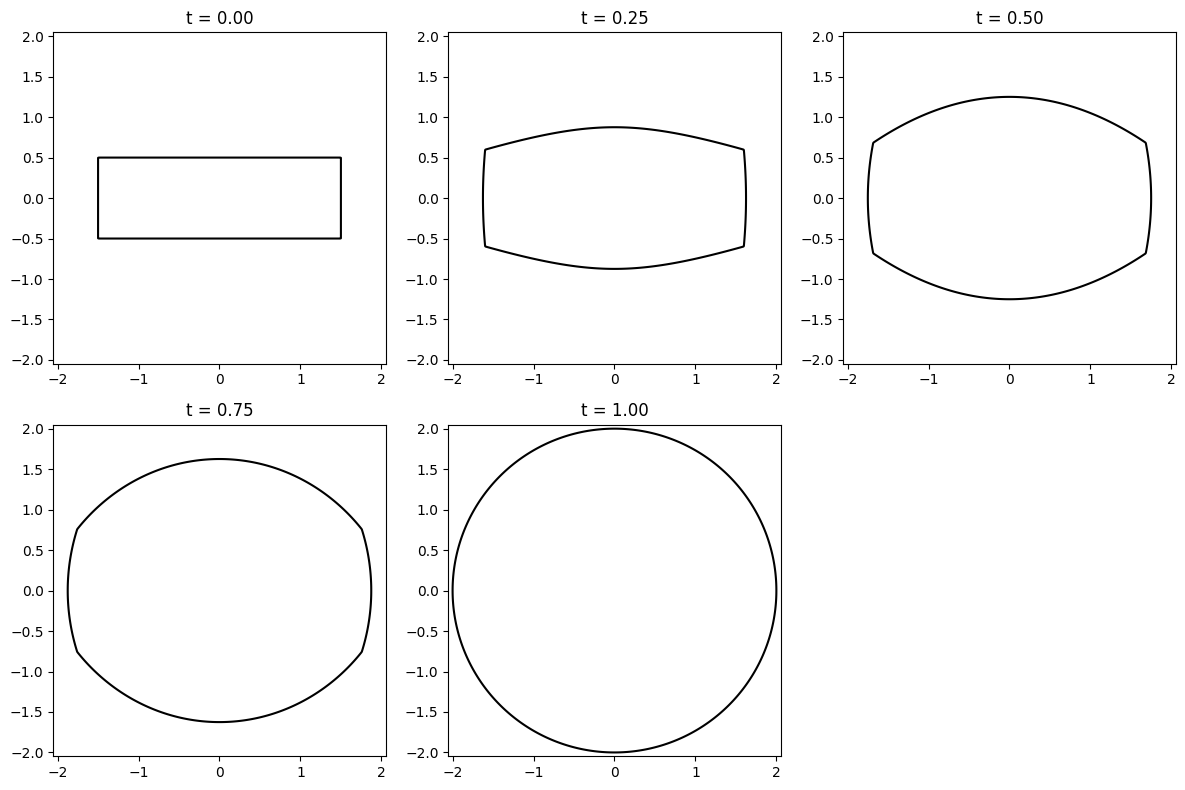

In [297]:

import numpy as np
import matplotlib.pyplot as plt

def sdf_rectangle(x, y, w, h):
    return np.maximum(np.abs(x) - w/2, np.abs(y) - h/2)

def sdf_circle(x, y, r):
    return np.sqrt(x**2 + y**2) - r

def sdf_interpolated(x, y, w, h, r, t):
    sdf_rect = sdf_rectangle(x, y, w, h)
    sdf_circ = sdf_circle(x, y, r)
    return (1 - t) * sdf_rect + t * sdf_circ

# Define grid
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)

# Parameters
w, h = 3.0, 1.0  # Rectangle width and height
r = 2.0          # Circle radius
t_values = np.linspace(0, 1, 5)  # Interpolation steps

# Plotting
plt.figure(figsize=(12, 8))
for i, t in enumerate(t_values):
    Z = sdf_interpolated(X, Y, w, h, r, t)
    plt.subplot(2, 3, i+1)
    plt.contour(X, Y, Z, levels=[0], colors='black')
    plt.title(f"t = {t:.2f}")
    plt.axis('equal')

plt.tight_layout()
plt.show()


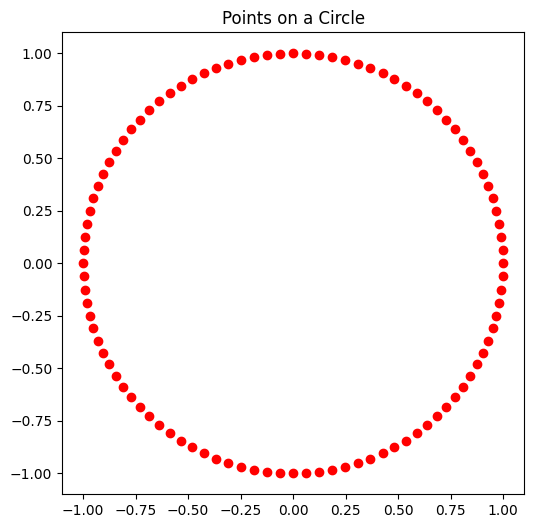

In [301]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 100  # Number of points
r = 1.0  # Radius of the circle

# Generate points on a circle
theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
circle_points = np.array([r * np.cos(theta), r * np.sin(theta)]).T

# Plot the points
plt.figure(figsize=(6, 6))
plt.scatter(circle_points[:, 0], circle_points[:, 1], c='red')
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Points on a Circle')
plt.show()


(400, 400)


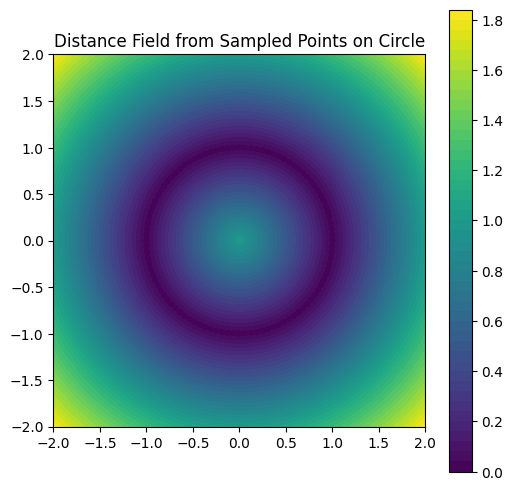

In [305]:
def distance_to_nearest_point(x, y, points):
    distances = np.sqrt((x - points[:, 0, np.newaxis, np.newaxis])**2 + (y - points[:, 1, np.newaxis, np.newaxis])**2)
    return np.min(distances, axis=0)

# Define grid
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)

# Compute distance field
dist_field = distance_to_nearest_point(X, Y, circle_points)

# Plot distance field
plt.figure(figsize=(6, 6))
plt.contourf(X, Y, dist_field, levels=50, cmap='viridis')
plt.colorbar()
plt.title('Distance Field from Sampled Points on Circle')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


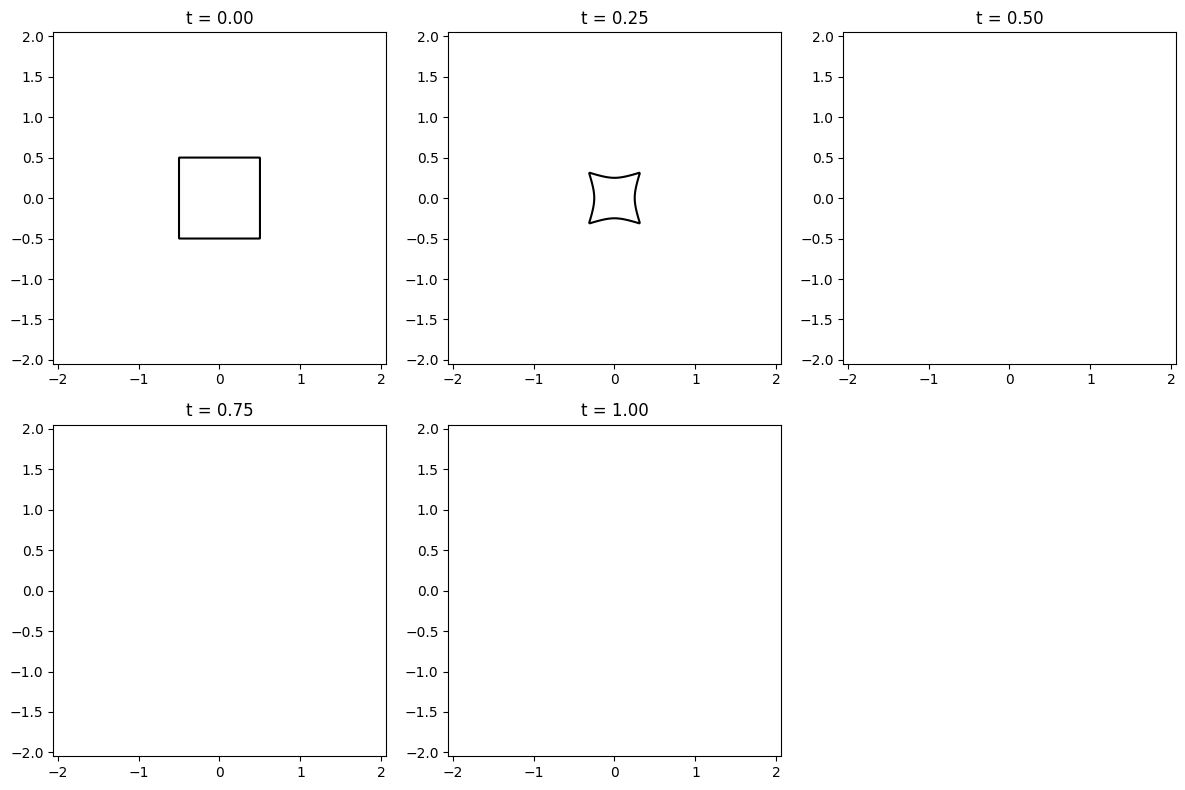

In [303]:
def sdf_rectangle(x, y, w, h):
    return np.maximum(np.abs(x) - w/2, np.abs(y) - h/2)

def sdf_interpolated(x, y, w, h, dist_field, t):
    sdf_rect = sdf_rectangle(x, y, w, h)
    return (1 - t) * sdf_rect + t * dist_field

# Parameters
w, h = 1.0, 1.0  # Rectangle width and height
t_values = np.linspace(0, 1, 5)  # Interpolation steps

# Plotting
plt.figure(figsize=(12, 8))
for i, t in enumerate(t_values):
    Z = sdf_interpolated(X, Y, w, h, dist_field, t)
    plt.subplot(2, 3, i+1)
    plt.contour(X, Y, Z, levels=[0], colors='black')
    plt.title(f"t = {t:.2f}")
    plt.axis('equal')

plt.tight_layout()
plt.show()
